In [37]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np


# Load in and preprocess Datasets (Fantasy, Combine, Advanced Statistics)

### Fantasy Data (trailing 10 years)

In [38]:
# Import Fantasy data from Pro Football Reference

years_for_pfr_data = ['2021',
                    '2020',
                    '2019',
                    '2018',
                    '2017',
                    '2016',
                    '2015',
                    '2014',
                    '2013',
                    '2012',
                    ]

fantasy_dfs = []
for year in years_for_pfr_data: 
    link = "https://www.pro-football-reference.com/years/" + year + "/fantasy.htm" 
    df = pd.read_html(link)[0]
    df['Year'] = year
    fantasy_dfs.append(df)
    
fantasy_df = pd.concat(fantasy_dfs).reset_index(drop=True)

# Flatten dataframe
fantasy_df.columns = fantasy_df.columns.get_level_values(0) + '_' +  fantasy_df.columns.get_level_values(1)

## Preprocess data
# Rename Columns
new_col_names = {'Unnamed: 0_level_0_Rk': 'Rank',
        'Unnamed: 1_level_0_Player': 'Player',
        'Unnamed: 2_level_0_Tm': 'Team',
        'Unnamed: 3_level_0_FantPos': 'Position',
        'Unnamed: 4_level_0_Age': 'Age',
        'Year_': 'Year'}
        
fantasy_df.rename(columns=new_col_names, inplace=True)

# Drop rows where column names are printed again (formatting issue w/ PFR website)
fantasy_df = fantasy_df[~fantasy_df['Rank'].isin(['Rk'])]

# Drop rows where Position is null (formatting issue w/ PFR website)
fantasy_df = fantasy_df[fantasy_df['Position'].notna()]

# Clean Player Name Column
fantasy_df['Player'] = fantasy_df['Player'].str.strip('*+')

# Fill NaN cells with 0
fantasy_df = fantasy_df.fillna(0)

# Rank Overall Fantasy Rank by Year (All values weren't filled in initally, must be added to dataset in place of zeros)
# ...

# Update Datatypes for columns
convert_dtype_dict = {'Rank': int,
                'Player': str,
                'Team': str,
                'Position': str,
                'Age': int,
                'Games_G': int,
                'Games_GS': int,
                'Passing_Cmp': int,
                'Passing_Att': int,
                'Passing_Yds': int,
                'Passing_TD': int,
                'Passing_Int': int,
                'Rushing_Att': int,
                'Rushing_Yds': int,
                'Rushing_Y/A': float,
                'Rushing_TD': int,
                'Receiving_Tgt': int,
                'Receiving_Rec': int,
                'Receiving_Yds': int,
                'Receiving_Y/R': float,
                'Receiving_TD': int,
                'Fumbles_Fmb': int,
                'Fumbles_FL': int,
                'Scoring_TD': int,
                'Scoring_2PM': int,
                'Scoring_2PP': int,
                'Fantasy_FantPt': int,
                'Fantasy_PPR': float,
                'Fantasy_DKPt': float,
                'Fantasy_FDPt': float,
                'Fantasy_VBD': float,
                'Fantasy_PosRank': int,
                'Fantasy_OvRank': int,
                'Year': str
                }
 
fantasy_df = fantasy_df.astype(convert_dtype_dict)

# shift column 'Year' to first position
first_column = fantasy_df.pop('Year')
  
# insert column at front of df
fantasy_df.insert(0, 'Year', first_column)

# Uncomment to Save dataset as flatfile (if desired)
#fantasy_df.to_csv('data/pfr_10yr_data_2022.csv')

### Standard Analytics from PFR (trailing 10 years)

In [39]:
## Passing Data
years_for_pfr_data = ['2021',
                    '2020',
                    '2019',
                    '2018',
                    '2017',
                    '2016',
                    '2015',
                    '2014',
                    '2013',
                    '2012',
                    ]

passing_dfs = []
for year in years_for_pfr_data: 
    link = "https://www.pro-football-reference.com/years/" + year + "/passing.htm" 
    df = pd.read_html(link)[0]
    df['Year'] = year
    passing_dfs.append(df)
    
passing_df = pd.concat(passing_dfs).reset_index(drop=True)

# Rename Columns
new_col_names = {'Rk': 'Rank',
        'Att': 'Passing_Att',
        'TD%': 'Passing_TD%',
        'Int%': 'Passing_Int%',
        '1D': 'Passing_1D',
        'Lng': 'Passing_Lng',
        'Y/A': 'Passing_Y/A',
        'AY/A': 'Passing_AY/A',
        'Y/C': 'Passing_Y/C',
        'Y/G': 'Passing_Y/G',
        'Rate': 'Passing_Rate',
        'QBR': 'Passing_QBR',
        'Sk': 'Passing_Sk',
        'Sk%': 'Passing_Sk%',
        'NY/A': 'Passing_NY/A',
        'ANY/A': 'Passing_ANY/A'}
        
passing_df.rename(columns=new_col_names, inplace=True)

# Drop rows where column names are printed again (formatting issue w/ PFR website)
passing_df = passing_df[~passing_df['Rank'].isin(['Rk'])]

# Clean Player Name Column
passing_df['Player'] = passing_df['Player'].str.strip('*+')

# Update Datatypes for columns
convert_dtype_dict = {'Player': str,
                'Passing_Att': int,
                'Passing_TD%': float,
                'Passing_Int%': float,
                'Passing_1D': int,
                'Passing_Lng': int,
                'Passing_Y/A': float,
                'Passing_AY/A': float,
                'Passing_Y/C': float,
                'Passing_Y/G': float,
                'Passing_Rate': float,
                'Passing_QBR': float,
                'Passing_Sk': str,
                'Passing_Sk%': float,
                'Passing_NY/A': float,
                'Passing_ANY/A': float
                }
passing_df = passing_df.astype(convert_dtype_dict)

# Downselect rows to players that threw 20 or more passes
passing_df = passing_df[passing_df['Passing_Att'] >= 20]

# Downselect columns
passing_df = passing_df[['Player','Passing_TD%','Passing_Int%','Passing_1D','Passing_Lng','Passing_Y/A','Passing_AY/A','Passing_Y/C','Passing_Y/G','Passing_Rate','Passing_QBR','Passing_Sk','Passing_Sk%','Passing_NY/A','Passing_ANY/A','Year']]

# Uncomment to Save dataset as flatfile (if desired)
passing_df.to_csv('data/pfr_10yr_passing_data_2022.csv')


## Rushing Data
rushing_dfs = []
for year in years_for_pfr_data: 
    link = "https://www.pro-football-reference.com/years/" + year + "/rushing.htm" 
    df = pd.read_html(link)[0]
    df['Year'] = year
    rushing_dfs.append(df)
    
rushing_df = pd.concat(rushing_dfs).reset_index(drop=True)

# Flatten dataframe
rushing_df.columns = rushing_df.columns.get_level_values(0) + '_' +  rushing_df.columns.get_level_values(1)

# Rename Columns
new_col_names = {'Unnamed: 0_level_0_Rk': 'Rank',
        'Unnamed: 1_level_0_Player': 'Player',
        'Unnamed: 2_level_0_Tm': 'Team',
        'Unnamed: 3_level_0_Age': 'Age',
        'Unnamed: 4_level_0_Pos': 'Position',
        'Unnamed: 14_level_0_Fmb': 'Rushing_Fumbles',
        'Year_': 'Year'}
        
rushing_df.rename(columns=new_col_names, inplace=True)

# Drop rows where column names are printed again (formatting issue w/ PFR website)
rushing_df = rushing_df[~rushing_df['Rank'].isin(['Rk'])]

# Clean Player Name Column
rushing_df['Player'] = rushing_df['Player'].str.strip('*+')

# Update Datatypes for columns
convert_dtype_dict = {'Player': str,
                'Rushing_1D': int,
                'Rushing_Lng': int,
                'Rushing_Y/A': float,
                'Rushing_Y/G': float,
                'Rushing_Fumbles': int,
                'Year': str
                }
rushing_df = rushing_df.astype(convert_dtype_dict)

# Downselect columns
rushing_df = rushing_df[['Player','Rushing_1D','Rushing_Lng','Rushing_Y/A','Rushing_Y/G','Rushing_Fumbles','Year']]

# Uncomment to Save dataset as flatfile (if desired)
rushing_df.to_csv('data/pfr_10yr_rushing_data_2022.csv')





## Receiving Data
receiving_dfs = []
for year in years_for_pfr_data: 
    link = "https://www.pro-football-reference.com/years/" + year + "/receiving.htm" 
    df = pd.read_html(link)[0]
    df['Year'] = year
    receiving_dfs.append(df)
    
receiving_df = pd.concat(receiving_dfs).reset_index(drop=True)

# Rename Columns
new_col_names = {'Rk': 'Rank',
        'Ctch%': 'Receiving_Ctch%',
        'Lng': 'Receiving_Lng',
        'Y/Tgt': 'Receiving_Y/Tgt',
        'R/G': 'Receiving_R/G',
        'Y/G': 'Receiving_Y/G',
        'Year_': 'Year'}
        
receiving_df.rename(columns=new_col_names, inplace=True)

# Drop rows where column names are printed again (formatting issue w/ PFR website)
receiving_df = receiving_df[~receiving_df['Rank'].isin(['Rk'])]

# Clean Player Name Column
receiving_df['Player'] = receiving_df['Player'].str.strip('*+')
# Clean Player Name Column
receiving_df['Receiving_Ctch%'] = receiving_df['Receiving_Ctch%'].str.strip('%')

# Update Datatypes for columns
convert_dtype_dict = {'Player': str,
                'Receiving_Ctch%': float,
                'Receiving_Lng': int,
                'Receiving_Y/Tgt': float,
                'Receiving_R/G': float,
                'Receiving_Y/G': float,
                'Year': str
                }
receiving_df = receiving_df.astype(convert_dtype_dict)

# Downselect columns
#receiving_df = receiving_df[['Player','Receiving_Ctch%','Receiving_Lng','Receiving_Y/Tgt','Receiving_R/G','Receiving_Y/G','Year']]
receiving_df = receiving_df[['Player','Receiving_Ctch%','Receiving_Lng','Receiving_Y/Tgt','Receiving_R/G','Year']]

# Uncomment to Save dataset as flatfile (if desired)
receiving_df.to_csv('data/pfr_10yr_receiving_data_2022.csv')

### Advanced Analytics from PFR (trailing 10 years)

In [ ]:
# To add at later date...
#https://www.pro-football-reference.com/years/2021/passing_advanced.htm
#https://www.pro-football-reference.com/years/2021/rushing_advanced.htm
#https://www.pro-football-reference.com/years/2021/receiving_advanced.htm

### Fantasy Draft ADP Data

In [70]:
# Import flat files of fantasy mock draft adp data from Fantasy Football Calculator
years_for_adp_data = ['2022',
                    '2021',
                    '2020',
                    '2019',
                    '2018',
                    '2017',
                    '2016',
                    '2015',
                    '2014',
                    '2013',
                    '2012'
                    ]

fantasy_draft_adp_dfs = []
for year in years_for_adp_data: 
    filename = "data/fantasy_draft_adp/draft_adp_" + year + ".csv" 
    df = pd.read_csv(filename)
    df['Year'] = year
    fantasy_draft_adp_dfs.append(df)
    
fantasy_draft_adp_df = pd.concat(fantasy_draft_adp_dfs).reset_index(drop=True)

fantasy_draft_adp_df.rename(columns={'#':'ADP', 'Name':'Player', 'Overall':'AvgMockDraftPosition', 'Pos': 'Position'}, inplace=True)

fantasy_draft_adp_df
fantasy_draft_adp_df_reduced = fantasy_draft_adp_df[['ADP','Player','AvgMockDraftPosition','Year','Position']]

### NFL Pre-Draft Combine Data

In [124]:
# Import NFL Combine Data from Pro Football Reference

years_for_pfr_data = ['2022',
                    '2021',
                    '2020',
                    '2019',
                    '2018',
                    '2017',
                    '2016',
                    '2015',
                    '2014',
                    '2013',
                    '2012',
                    '2011',
                    '2010',
                    '2009',
                    '2008',
                    '2007',
                    '2006',
                    '2005',
                    '2004',
                    '2003',
                    '2002',
                    '2001',
                    '2000',
                    ]

combine_dfs = []
for year in years_for_pfr_data: 
    link = "https://www.pro-football-reference.com/draft/" + year + "-combine.htm" 
    df = pd.read_html(link)[0]
    df['Combine_Year'] = year
    combine_dfs.append(df)
    
combine_df = pd.concat(combine_dfs).reset_index(drop=True)

## Preprocess Data

# Drop rows where column names are printed again (formatting issue w/ PFR website)
combine_df = combine_df[~combine_df['Player'].isin(['Player'])]

# Drop Unnecessary columns
combine_df = combine_df.drop(['College','Drafted (tm/rnd/yr)'], axis=1)

# Fill NaN cells with 0
combine_df = combine_df.fillna(0)
# Fill NaN cells with median value of column
#combine_df.apply(lambda x: x.fillna(x.median()),axis=0)

# Update height column to usable number value
ht_df = combine_df["Ht"].str.split("-", n = 1, expand = True)
combine_df["Ft"] = ht_df[0]
combine_df = combine_df.fillna(0)
combine_df["Ft"] = combine_df["Ft"].astype('int')
combine_df["In"] = ht_df[1]
combine_df = combine_df.fillna(0)
combine_df["In"] = combine_df["In"].astype('int')
combine_df.drop(columns =["Ht"], inplace = True)
combine_df["Ht"] = combine_df['Ft'] + combine_df['In']/12


# Update Datatypes for columns
convert_dtype_dict = {'Player': str,
                'Pos':str,
                'School': str,
                'Ht': float,
                'Wt': int,
                '40yd': float,
                'Vertical': float,
                'Bench': int,
                'Broad Jump': int,
                '3Cone': float,
                'Shuttle': float,
                'Combine_Year': str,
                }
combine_df = combine_df.astype(convert_dtype_dict)

combine_df.rename(columns={'Broad Jump': 'BroadJump', 'Pos':'Position'}, inplace=True)


# Uncomment to Save combine dataset as flatfile (if desired)
combine_df.to_csv('data/pfr_combine_data_2000_thru_2022.csv')



TypeError: Cannot specify both 'axis' and any of 'index' or 'columns'

### Join in other data specific to players (combine results, standard/advanced analytics, etc)

In [72]:
# Merge Fantasy points data with passing data
final_df = fantasy_df.merge(passing_df, how='left', on=['Player','Year'])

# Merge DF with rushing data
final_df = final_df.merge(rushing_df, how='left', on=['Player','Year'])

# Merge DF with receiving data
final_df = final_df.merge(receiving_df, how='left', on=['Player','Year'])

# Merge in Fantasy Draft ADP
final_df = final_df.merge(fantasy_draft_adp_df_reduced, how='outer', on=['Player','Year'])

# Merge Fantasy points data with combine data (fix later, pulling in name multiples)
final_df = final_df.merge(combine_df, how='left', on=['Player','Position'])

KeyError: 'Position'

### Remove Second Josh Allen's combined data (Kentucky Josh)
- lol
- and also Mike Williams, Adrian Peterson, Alex Smith, and David Johnson

In [ ]:
# There are duplicates where players that share names with other players
val_cnt_rows = final_df.Player.value_counts()
val_cnt_rows.head(20)

In [ ]:
# One Josh Allen for this study
ja = final_df[((final_df['Player'] == 'Josh Allen') & (final_df['Combine_Year'] == "2019"))].index
final_df = final_df.drop(ja)

# One Mike Williams for this study
mw = final_df[((final_df['Player'] == 'Mike Williams') & ((final_df['Combine_Year'] == "2005") | (final_df['Combine_Year'] == "2010")))].index
final_df = final_df.drop(mw)

# One Adrian Peterson for this study
ap = final_df[((final_df['Player'] == 'Adrian Peterson') & (final_df['Combine_Year'] == "2002"))].index
final_df = final_df.drop(ap)

# One Alex Smith for this study
als = final_df[((final_df['Player'] == 'Alex Smith') & (final_df['Position']=="TE"))].index
final_df = final_df.drop(als)

# One David Johnson for this study
dj = final_df[((final_df['Player'] == 'David Johnson') & (final_df['Combine_Year'].isna()))].index
final_df = final_df.drop(dj)
dj_pt2 = final_df[((final_df['Player'] == 'David Johnson') & (final_df['Year'] == '2015') & ((final_df['Rushing_1D']  < 36) | (final_df['Receiving_Lng'] < 55)))].index
final_df = final_df.drop(dj_pt2)
dj_pt3 = final_df[((final_df['Player'] == 'David Johnson') & (final_df['Year'] == '2016') & (final_df['Receiving_Lng'] < 58))].index
final_df = final_df.drop(dj_pt3)

final_df = final_df.drop_duplicates()


### Add additional custom parameters

In [ ]:
# Add as necessary

### Save final_df as master dataframe

In [ ]:
# save updated master dataframe
final_df.to_csv('data/master_df_w_2022.csv')

# Explore Dataset

In [ ]:
# Number 1 ranked players from each fantasy season
fantasy_df[fantasy_df['Fantasy_OvRank']==1]

In [ ]:
# One players Fantasy Prodution during career
fantasy_df[fantasy_df['Player']=="Todd Gurley"]

In [ ]:
# Functions located in this cell
# Do one for pulling pfr data

### Plots

In [ ]:
## Line plot of Age vs Fantasy PPR points (line by position)
# Groupby on Data
top_20_pos_rk_players = fantasy_df[fantasy_df['Fantasy_PosRank'] <= 20]
age_pos_avg_ppr_gb = top_20_pos_rk_players.groupby(['Age','Position']).mean('Fantasy_PPR').reset_index()

# Seaborn

#age_pos_ppr_fig = sns.lineplot(data=age_pos_avg_ppr_gb, x='Age', y='Fantasy_PPR', hue='Position')
#age_pos_ppr_fig.set_title('Average Fantasy Points (PPR) by Age and Position')
#age_pos_ppr_fig.set_xlabel('Age')
#age_pos_ppr_fig.set_ylabel('Fantasy Points')

# Plotly
age_pos_ppr_fig_px = px.line(age_pos_avg_ppr_gb, x="Age", y="Fantasy_PPR", color='Position', title='Average Fantasy Points (PPR) by Age and Position')
plot_filename='plots/avg_points_by_age_position.html'
age_pos_ppr_fig_px.write_html(plot_filename)
age_pos_ppr_fig_px.show()

In [ ]:
## Line plot of count on top 20 players at each position by Age (line by position)
# Groupby on Data
top_20_pos_rk_players = fantasy_df[fantasy_df['Fantasy_PosRank'] <= 20]
age_pos_count_gb = top_20_pos_rk_players.groupby(['Age','Position']).count().reset_index()

# Plotly
posrnk_age_count_plot_px = px.line(age_pos_count_gb, x="Age", y="Rank", color='Position', title='Number of Top 20 Position Rankings by Age and Position')
posrnk_age_count_plot_px.update_layout(
                   xaxis_title='Age',
                   yaxis_title='Count of Top 20 Players')
plot_filename='plots/top20_player_count_by_age_position.html'
posrnk_age_count_plot_px.write_html(plot_filename)
posrnk_age_count_plot_px.show()

In [ ]:
## Scatter plot of Position Rank vs Fantasy PPR points (Color by Position)

# Seaborn
#posrnk_ppr_plot_sns = sns.scatterplot(data=final_df, x='Fantasy_PosRank', y='Fantasy_PPR', hue='Position')
#posrnk_ppr_plot_sns.set_title('Average Fantasy Points (PPR) by Position')
#posrnk_ppr_plot_sns.set_xlabel('Position Rank')
#posrnk_ppr_plot_sns.set_ylabel('Fantasy Points')

# Plotly
posrnk_ppr_plot_px = px.scatter(fantasy_df, x="Fantasy_PosRank", y="Fantasy_PPR", color='Position', hover_data=['Player', 'Year'], title='Fantasy Points (PPR) by Position and Rank')
plot_filename='plots/points_by_position.html'
posrnk_ppr_plot_px.write_html(plot_filename)
posrnk_ppr_plot_px.show()

In [ ]:
# Boxplot of position vs Fantasy points
# Seaborn
#box_pos_ppr_sns = sns.boxplot(data=final_df, x='Position', y='Fantasy_PPR')

# Plotly
box_pos_ppr_px = px.box(fantasy_df, x="Position", y="Fantasy_PPR", hover_data=['Player', 'Year'], title='Fantasy Points by Position')
plot_filename='plots/boxplot_points_by_position.html'
box_pos_ppr_px.write_html(plot_filename)
box_pos_ppr_px.show()

In [ ]:
#rbs_speed = final_df[(final_df['Position'] == 'RB') & (final_df['40yd'] > 0)]
#rb_speed_ppr_px = px.scatter(rbs_speed, x='40yd', y='Fantasy_PPR', hover_data=['Player'])
#rb_speed_ppr_px.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
qbs_speed = final_df[(final_df['Position'] == 'QB') & (final_df['40yd'] > 0)]
rbs_speed = final_df[(final_df['Position'] == 'RB') & (final_df['40yd'] > 0)]
wrs_speed = final_df[(final_df['Position'] == 'WR') & (final_df['40yd'] > 0)]
tes_speed = final_df[(final_df['Position'] == 'TE') & (final_df['40yd'] > 0)]

speed_and_pos_vs_points = make_subplots(rows=2, cols=2, subplot_titles=('Quarterback', 'Running Back', 'Wide Receiver', 'Tight End'))

speed_and_pos_vs_points.add_trace(
    go.Scatter(
        x=qbs_speed['40yd'],
        y=qbs_speed['Fantasy_PPR'],
        mode='markers'
    ),
    row=1, col=1
)

speed_and_pos_vs_points.add_trace(
    go.Scatter(
        x=rbs_speed['40yd'],
        y=rbs_speed['Fantasy_PPR'],
        mode='markers'
    ),
    row=1, col=2
)

speed_and_pos_vs_points.add_trace(
    go.Scatter(
        x=wrs_speed['40yd'],
        y=wrs_speed['Fantasy_PPR'],
        mode='markers'
    ),
    row=2, col=1
)

speed_and_pos_vs_points.add_trace(
    go.Scatter(
        x=tes_speed['40yd'],
        y=tes_speed['Fantasy_PPR'],
        mode='markers'
    ),
    row=2, col=2
)

# Update xaxis properties
speed_and_pos_vs_points.update_xaxes(title_text="40-yd Dash time (secs)", range=[4, 6], row=1, col=1)
speed_and_pos_vs_points.update_xaxes(title_text="40-yd Dash time (secs)", range=[4, 6], row=1, col=2)
speed_and_pos_vs_points.update_xaxes(title_text="40-yd Dash time (secs)", range=[4, 6], row=2, col=1)
speed_and_pos_vs_points.update_xaxes(title_text="40-yd Dash time (secs)", range=[4, 6], row=2, col=2)

# Update yaxis properties
speed_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=[0, 500], row=1, col=1)
speed_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=[0, 500], row=1, col=2)
speed_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=[0, 500], row=2, col=1)
speed_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=[0, 500], row=2, col=2)

speed_and_pos_vs_points.update_layout(title_text="Fantasy Points (PPR) vs 40-Time by Position", height=600, showlegend=False)

plot_filename='plots/speed_vs_points_and_position.html'
speed_and_pos_vs_points.write_html(plot_filename)
speed_and_pos_vs_points.show()

In [ ]:
qbs_vert = final_df[(final_df['Position'] == 'QB') & (final_df['Vertical'] > 0)]
rbs_vert = final_df[(final_df['Position'] == 'RB') & (final_df['Vertical'] > 0)]
wrs_vert = final_df[(final_df['Position'] == 'WR') & (final_df['Vertical'] > 0)]
tes_vert = final_df[(final_df['Position'] == 'TE') & (final_df['Vertical'] > 0)]

vert_and_pos_vs_points = make_subplots(rows=2, cols=2, subplot_titles=('Quarterback', 'Running Back', 'Wide Receiver', 'Tight End'))

vert_and_pos_vs_points.add_trace(
    go.Scatter(
        x=qbs_vert['Vertical'],
        y=qbs_vert['Fantasy_PPR'],
        mode='markers'
    ),
    row=1, col=1
)

vert_and_pos_vs_points.add_trace(
    go.Scatter(
        x=rbs_vert['Vertical'],
        y=rbs_vert['Fantasy_PPR'],
        mode='markers'
    ),
    row=1, col=2
)

vert_and_pos_vs_points.add_trace(
    go.Scatter(
        x=wrs_vert['Vertical'],
        y=wrs_vert['Fantasy_PPR'],
        mode='markers'
    ),
    row=2, col=1
)

vert_and_pos_vs_points.add_trace(
    go.Scatter(
        x=tes_vert['Vertical'],
        y=tes_vert['Fantasy_PPR'],
        mode='markers'
    ),
    row=2, col=2
)

# Update xaxis properties
vert_and_pos_vs_points.update_xaxes(title_text="Vertical Jump (inches)", range=[10, 50], row=1, col=1)
vert_and_pos_vs_points.update_xaxes(title_text="Vertical Jump (inches)", range=[10, 50], row=1, col=2)
vert_and_pos_vs_points.update_xaxes(title_text="Vertical Jump (inches)", range=[10, 50], row=2, col=1)
vert_and_pos_vs_points.update_xaxes(title_text="Vertical Jump (inches)", range=[10, 50], row=2, col=2)

# Update yaxis properties
vert_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=[0, 500], row=1, col=1)
vert_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=[0, 500], row=1, col=2)
vert_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=[0, 500], row=2, col=1)
vert_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=[0, 500], row=2, col=2)

vert_and_pos_vs_points.update_layout(title_text="Fantasy Points (PPR) vs Vertical Jump by Position", height=600, showlegend=False)

plot_filename='plots/vert_vs_points_and_position.html'
vert_and_pos_vs_points.write_html(plot_filename)
vert_and_pos_vs_points.show()

In [ ]:
def pts_vs_combine_scatterplots(df, subplot_config, yaxis_range=[0,500]):
    for plot in subplot_config['plots']:
        print("Using "+plot['args']['measurement']+" for plot...")
        measure = plot['args']['measurement']
        unit = plot['args']['units']
        xrange = plot['args']['xrange']

        qbs = df[(df['Position'] == 'QB') & (df[measure] > 0)]
        rbs = df[(df['Position'] == 'RB') & (df[measure] > 0)]
        wrs = df[(df['Position'] == 'WR') & (df[measure] > 0)]
        tes = df[(df['Position'] == 'TE') & (df[measure] > 0)]

        meas_and_pos_vs_points = make_subplots(rows=2, cols=2, subplot_titles=('Quarterback', 'Running Back', 'Wide Receiver', 'Tight End'))

        meas_and_pos_vs_points.add_trace(
            go.Scatter(
                x=qbs[measure],
                y=qbs['Fantasy_PPR'],
                mode='markers'
            ),
            row=1, col=1
        )

        meas_and_pos_vs_points.add_trace(
            go.Scatter(
                x=rbs[measure],
                y=rbs['Fantasy_PPR'],
                mode='markers'
            ),
            row=1, col=2
        )

        meas_and_pos_vs_points.add_trace(
            go.Scatter(
                x=wrs[measure],
                y=wrs['Fantasy_PPR'],
                mode='markers'
            ),
            row=2, col=1
        )

        meas_and_pos_vs_points.add_trace(
            go.Scatter(
                x=tes[measure],
                y=tes['Fantasy_PPR'],
                mode='markers'
            ),
            row=2, col=2
        )

        # Update xaxis properties
        x_title = str(measure)+' ('+str(unit)+')'
        meas_and_pos_vs_points.update_xaxes(title_text=x_title, range=xrange, row=1, col=1)
        meas_and_pos_vs_points.update_xaxes(title_text=x_title, range=xrange, row=1, col=2)
        meas_and_pos_vs_points.update_xaxes(title_text=x_title, range=xrange, row=2, col=1)
        meas_and_pos_vs_points.update_xaxes(title_text=x_title, range=xrange, row=2, col=2)

        # Update yaxis properties
        meas_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=yaxis_range, row=1, col=1)
        meas_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=yaxis_range, row=1, col=2)
        meas_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=yaxis_range, row=2, col=1)
        meas_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=yaxis_range, row=2, col=2)

        meas_and_pos_vs_points.update_layout(title_text="Fantasy Points (PPR) vs "+str(measure)+" by Position", height=600, showlegend=False)

        plot_filename='plots/'+str(measure)+'_vs_points_and_position.html'
        meas_and_pos_vs_points.write_html(plot_filename)
        print("Plot saved")
    print('')
    print('Plots complete!')


subplot_config = \
{
    "plots":[
        {
            "args": {
                "measurement":"40yd",
                "units": 'secs',
                "xrange": [4,6]
            }
        },
        {
            "args": {
                "measurement": "Vertical",
                "units": 'inches',
                "xrange": [20,50]
            }
        },
        {
            "args": {
                "measurement": "Bench",
                "units": 'reps',
                "xrange":[0,50]
            }
        },
        {
            "args": {
                "measurement": "BroadJump",
                "units": 'inches',
                "xrange": [80,150]
            }
        },
        {
            "args": {
                "measurement": "3Cone",
                "units": 'secs',
                "xrange": [6,9]
            }
        },
        {
            "args": {
                "measurement": "Shuttle",
                "units": 'secs',
                "xrange": [3.5,5.5]
            }
        }
    ]
}


pts_vs_combine_scatterplots(final_df, subplot_config)

In [45]:
# Master Dataset
df = pd.read_csv('data/master_df.csv')

# Separate Datasets by Position
qbs = df[df['Position'] == 'QB']

from sklearn.preprocessing import StandardScaler
model = StandardScaler()
#qb_reduced_df = qbs[['Age','Passing_TD%','Passing_Int%','Passing_1D','Passing_Lng','Passing_Y/A','Passing_AY/A','Passing_Y/C','Passing_Sk','Passing_Sk%','Passing_NY/A','Passing_ANY/A','Rushing_1D','Rushing_Lng','Rushing_Y/A_y','Fantasy_PPR']]
#qb_reduced_df = qbs[['Age','Passing_TD%','Passing_Int%','Passing_Lng','Passing_Y/A','Passing_AY/A','Passing_Y/C','Passing_Sk','Passing_Sk%','Passing_NY/A','Passing_ANY/A','Rushing_Lng','Rushing_Y/A_y','Fantasy_PPR']]
qb_reduced_df = qbs[['Age','Passing_TD%','Passing_Int%','Passing_Lng','Passing_Y/A','Passing_AY/A','Passing_Y/C','Passing_Sk%','Passing_NY/A','Passing_ANY/A','Rushing_Lng','Rushing_Y/A_y','Fantasy_PPR']]
#qb_reduced_df = qb_reduced_df.dropna()
qb_reduced_df.replace(0, np.nan, inplace=True)
qb_reduced_df = qb_reduced_df.apply(lambda x: x.fillna(x.median()),axis=0)
model.fit(qb_reduced_df)

#qb_plt = sns.pairplot(qb_reduced_df)
#plt.savefig('plots/qb_pairplot.png')
qb_reduced_df.to_csv('data/qb_std_stats_no_1ds_or_sks.csv')


/var/folders/79/bdpvq_812sxg5cwqpvw22v040000gn/T/ipykernel_2024/3627560528.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qb_reduced_df.replace(0, np.nan, inplace=True)


In [46]:
# Master Dataset
df = pd.read_csv('data/master_df.csv')
rbs = df[df['Position'] == 'RB']

from sklearn.preprocessing import StandardScaler
model = StandardScaler()
#rb_reduced_df = rbs[['Age','Rushing_1D','Rushing_Lng','Rushing_Y/A_y','Receiving_Ctch%','Receiving_Lng','Receiving_Y/Tgt','Fantasy_PPR']]
rb_reduced_df = rbs[['Age','Rushing_Fumbles','Rushing_Lng','Rushing_Y/A_y','Receiving_Ctch%','Receiving_Lng','Receiving_Y/Tgt','Fantasy_PPR']]
#rb_reduced_df = rb_reduced_df.dropna()
rb_reduced_df.replace(0, np.nan, inplace=True)
rb_reduced_df = rb_reduced_df.apply(lambda x: x.fillna(x.median()),axis=0)
model.fit(rb_reduced_df)
rb_reduced_df.to_csv('data/rb_std_stats_no_1ds.csv')
#rb_plt = sns.pairplot(rb_reduced_df)
#plt.savefig('plots/rb_pairplot.png')

/var/folders/79/bdpvq_812sxg5cwqpvw22v040000gn/T/ipykernel_2024/645942034.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rb_reduced_df.replace(0, np.nan, inplace=True)


In [47]:
# Master Dataset
df = pd.read_csv('data/master_df.csv')

wrs = df[df['Position'] == 'WR']

from sklearn.preprocessing import StandardScaler
model = StandardScaler()
wr_reduced_df = wrs[['Age','Receiving_Ctch%','Receiving_Lng','Receiving_Y/Tgt','Fantasy_PPR']]
#wr_reduced_df = wr_reduced_df.dropna()
wr_reduced_df.replace(0, np.nan, inplace=True)
wr_reduced_df = wr_reduced_df.apply(lambda x: x.fillna(x.median()),axis=0)
model.fit(wr_reduced_df)

#wr_plt = sns.pairplot(wr_reduced_df)
#plt.savefig('plots/wr_pairplot.png')

/var/folders/79/bdpvq_812sxg5cwqpvw22v040000gn/T/ipykernel_2024/107875586.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wr_reduced_df.replace(0, np.nan, inplace=True)


StandardScaler()

In [48]:
# Master Dataset
df = pd.read_csv('data/master_df.csv')

tes = df[df['Position'] == 'TE']

from sklearn.preprocessing import StandardScaler
model = StandardScaler()
te_reduced_df = tes[['Age','Receiving_Ctch%','Receiving_Lng','Receiving_Y/Tgt','Fantasy_PPR']]
#te_reduced_df = te_reduced_df.dropna()
te_reduced_df.replace(0, np.nan, inplace=True)
te_reduced_df = te_reduced_df.apply(lambda x: x.fillna(x.median()),axis=0)
model.fit(te_reduced_df)

#te_plt = sns.pairplot(te_reduced_df)
#plt.savefig('plots/te_pairplot.png')

/var/folders/79/bdpvq_812sxg5cwqpvw22v040000gn/T/ipykernel_2024/1905601029.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te_reduced_df.replace(0, np.nan, inplace=True)


StandardScaler()

In [49]:
# Master Dataset
df = pd.read_csv('data/master_df.csv')

# Separate Datasets by Position
qbs = df[df['Position'] == 'QB']

from sklearn.preprocessing import StandardScaler
model = StandardScaler()
qb_combine_df = qbs[['Ht','Wt','40yd','Vertical','Bench','BroadJump','3Cone','Shuttle','Combine_Year','Fantasy_PPR']]
#qb_combine_df = qb_combine_df.dropna()
qb_combine_df.replace(0, np.nan, inplace=True)
qb_combine_df = qb_combine_df.apply(lambda x: x.fillna(x.median()),axis=0)
model.fit(qb_combine_df)

#qb_combine_plt = sns.pairplot(qb_combine_df)
#plt.savefig('plots/qb_combine_pairplot.png')

/var/folders/79/bdpvq_812sxg5cwqpvw22v040000gn/T/ipykernel_2024/2569447729.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qb_combine_df.replace(0, np.nan, inplace=True)


StandardScaler()

/var/folders/79/bdpvq_812sxg5cwqpvw22v040000gn/T/ipykernel_2024/806791021.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rb_combine_df.replace(0, np.nan, inplace=True)


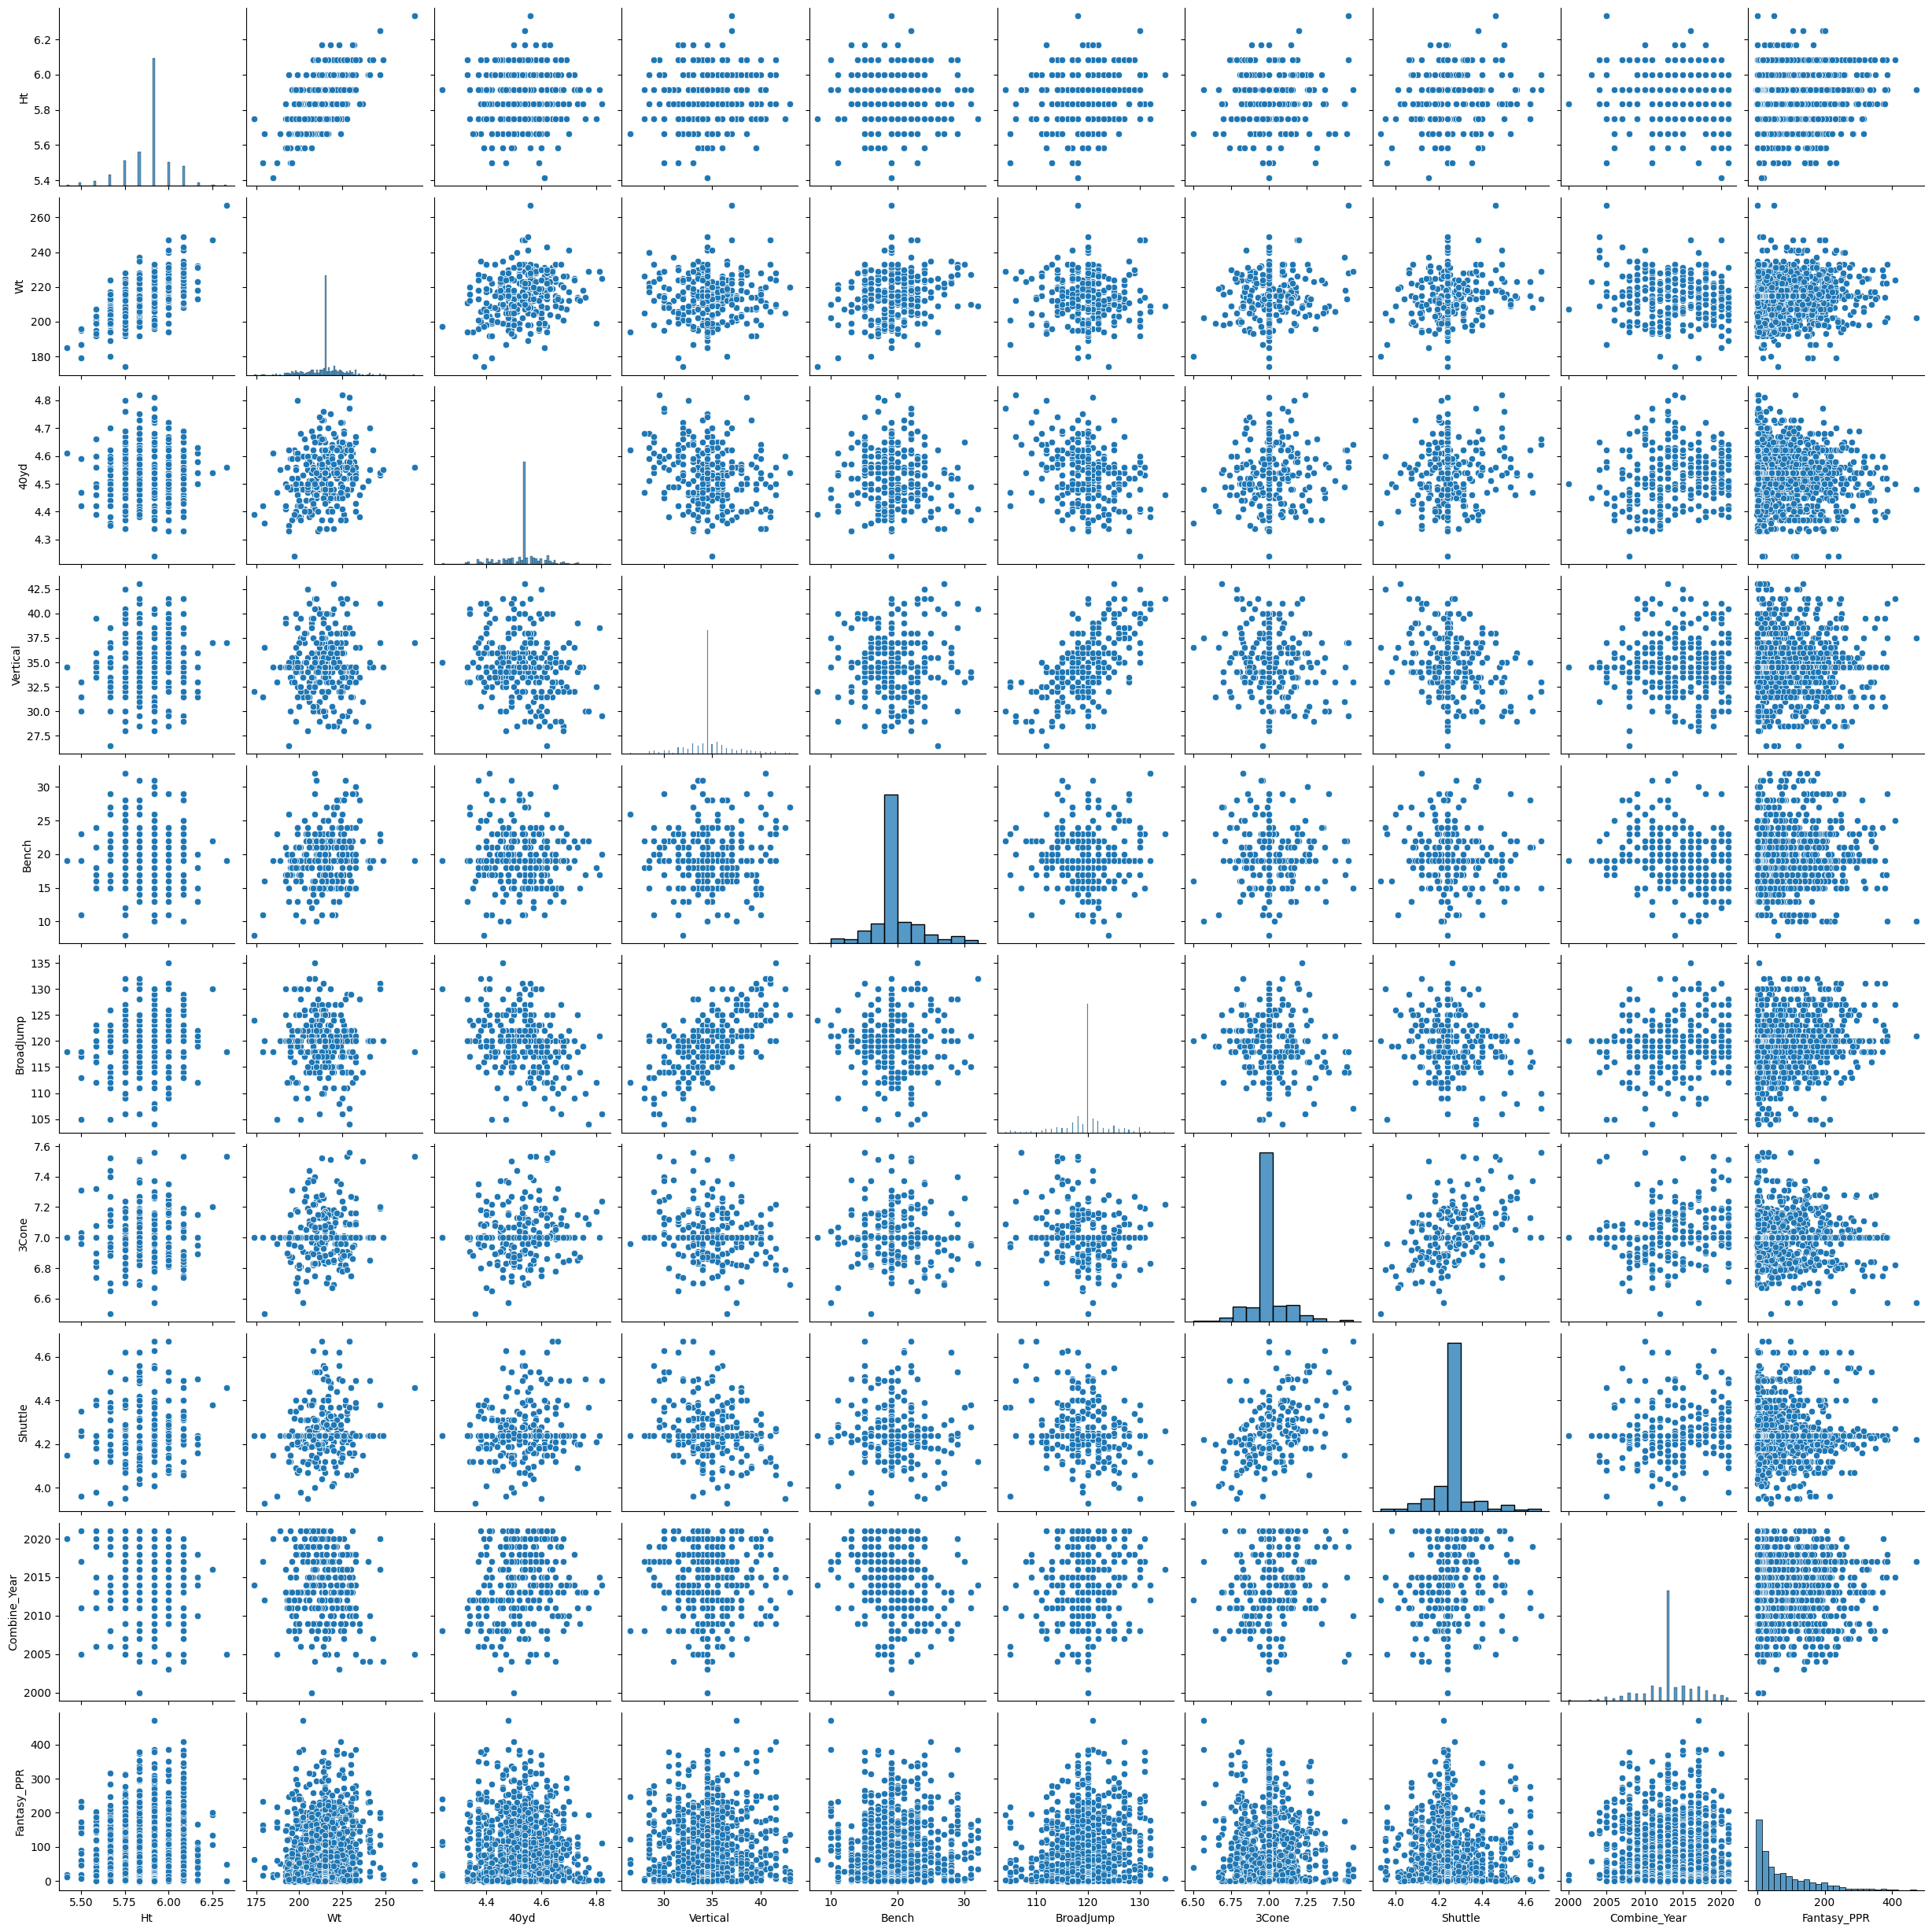

In [50]:
# Master Dataset
df = pd.read_csv('data/master_df.csv')

# Separate Datasets by Position
rbs = df[df['Position'] == 'RB']

from sklearn.preprocessing import StandardScaler
model = StandardScaler()
rb_combine_df = rbs[['Ht','Wt','40yd','Vertical','Bench','BroadJump','3Cone','Shuttle','Combine_Year','Fantasy_PPR']]
#rb_combine_df = rb_combine_df.dropna()
rb_combine_df.replace(0, np.nan, inplace=True)
rb_combine_df = rb_combine_df.apply(lambda x: x.fillna(x.median()),axis=0)
model.fit(rb_combine_df)

rb_combine_plt = sns.pairplot(rb_combine_df)
plt.savefig('plots/rb_combine_pairplot.png')

In [51]:
# Master Dataset
df = pd.read_csv('data/master_df.csv')

# Separate Datasets by Position
wrs = df[df['Position'] == 'WR']

from sklearn.preprocessing import StandardScaler
model = StandardScaler()
wr_combine_df = wrs[['Ht','Wt','40yd','Vertical','Bench','BroadJump','3Cone','Shuttle','Combine_Year','Fantasy_PPR']]
#wr_combine_df = wr_combine_df.dropna()
wr_combine_df.replace(0, np.nan, inplace=True)
wr_combine_df = wr_combine_df.apply(lambda x: x.fillna(x.median()),axis=0)
model.fit(wr_combine_df)

wr_combine_plt = sns.pairplot(wr_combine_df)
plt.savefig('plots/wr_combine_pairplot.png')

/var/folders/79/bdpvq_812sxg5cwqpvw22v040000gn/T/ipykernel_2024/2650642304.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wr_combine_df.replace(0, np.nan, inplace=True)


In [52]:
# Master Dataset
df = pd.read_csv('data/master_df.csv')

# Separate Datasets by Position
tes = df[df['Position'] == 'TE']

from sklearn.preprocessing import StandardScaler
model = StandardScaler()
te_combine_df = tes[['Ht','Wt','40yd','Vertical','Bench','BroadJump','3Cone','Shuttle','Combine_Year','Fantasy_PPR']]
#te_combine_df = te_combine_df.dropna()
te_combine_df.replace(0, np.nan, inplace=True)
te_combine_df = te_combine_df.apply(lambda x: x.fillna(x.median()),axis=0)
model.fit(te_combine_df)

te_combine_plt = sns.pairplot(te_combine_df)
plt.savefig('plots/te_combine_pairplot.png')



/var/folders/79/bdpvq_812sxg5cwqpvw22v040000gn/T/ipykernel_2024/1850558807.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te_combine_df.replace(0, np.nan, inplace=True)


In [53]:
qb_reduced_df.to_csv('data/qb_std_stats.csv')
rb_reduced_df.to_csv('data/rb_std_stats.csv')
wr_reduced_df.to_csv('data/wr_std_stats.csv')
te_reduced_df.to_csv('data/te_std_stats.csv')
qb_combine_df.to_csv('data/qb_combine_stats.csv')
rb_combine_df.to_csv('data/rb_combine_stats.csv')
wr_combine_df.to_csv('data/wr_combine_stats.csv')
te_combine_df.to_csv('data/te_combine_stats.csv')

In [ ]:
qb_reduced_df_no_1ds = qbs[['Age','Passing_TD%','Passing_Int%','Passing_Lng','Passing_Y/A','Passing_AY/A','Passing_Y/C','Passing_Sk','Passing_Sk%','Passing_NY/A','Passing_ANY/A','Rushing_Lng','Rushing_Y/A_y','Fantasy_PPR']]
qb_reduced_df_no_1ds.to_csv('data/qb_std_stats_no_1ds.csv')

In [ ]:
df = pd.read_csv('data/master_df.csv')
arod_example_lag_data = df[df['Player'] == 'Aaron Rodgers']

In [54]:
def three_year_avg(df, row, param):
    if row['Year'] - 3 >= 2012:
        player_df = df[df['Player'] == row['Player']]
        three_year_data = player_df[(player_df['Year'] >= (row['Year'] - 3)) & (player_df['Year'] <= (row['Year']-1))]
        return three_year_data[param].mean()
    else:
        return np.NaN

def three_year_stddev(df, row, param):
    if row['Year'] - 3 >= 2012:
        player_df = df[df['Player'] == row['Player']]
        three_year_data = player_df[(player_df['Year'] >= (row['Year'] - 3)) & (player_df['Year'] <= (row['Year']-1))]
        return three_year_data[param].std()
    else:
        return np.NaN

In [ ]:
# Testing 3 yr functions on one player
arod_example_lag_data['3Year_lagging_avg'] = arod_example_lag_data.apply(lambda row: three_year_avg(arod_example_lag_data,row),axis=1)
arod_example_lag_data[['Year','Fantasy_PPR','3Year_lagging_avg']]

In [55]:
# Testing 3 yr functions on full datadrame
df = pd.read_csv('data/master_df.csv')
qbs = df[df['Position'] == "QB"]
qbs['3Year_lagging_avg'] = qbs.apply(lambda row: three_year_avg(qbs,row),axis=1)
qbs[qbs['Player'] == 'Tom Brady']

TypeError: three_year_avg() missing 1 required positional argument: 'param'

In [56]:
# Apply 3 trailing year PPR avg and std dev for each player
df = pd.read_csv('data/master_df.csv')
df['3PriorYear_Avg_PPR'] = df.apply(lambda row: three_year_avg(df,row, 'Fantasy_PPR'),axis=1)
df['3PriorYear_StdDev_PPR'] = df.apply(lambda row: three_year_stddev(df,row, 'Fantasy_PPR'),axis=1)
df.to_csv('data/master_df.csv')

In [73]:
df = pd.read_csv('data/master_df_w_2022.csv')


In [ ]:
pass_adv_accuracy = pd.read_csv('data/pass_adv_accuracy.csv')
pass_adv_air_yards = pd.read_csv('data/pass_adv_air_yards.csv')
pass_adv_play_type = pd.read_csv('data/pass_adv_play_type.csv')
pass_adv_pressure = pd.read_csv('data/pass_adv_pressure.csv')
rush_adv = pd.read_csv('data/rush_adv.csv')
rec_adv = pd.read_csv('data/rec_adv.csv')

pass_adv_accuracy = pass_adv_accuracy[['Player','Bats','ThAwy','Spikes','Drops','Drop%','BadTh','Bad%','OnTgt','OnTgt%']]
pass_adv_air_yards = pass_adv_air_yards[['Player','IAY','IAY/PA','CAY','CAY/Cmp','CAY/PA','YAC','YAC/Cmp']]
pass_adv_play_type = pass_adv_play_type[['Player','RPO_Plays','RPO_Yds','RPO_PassAtt','RPO_PassYds','RPO_RushAtt','RPO_RushYds','PlayAction_PassAtt','PlayAction_PassYds']]
pass_adv_pressure = pass_adv_pressure[['Player','Sk','PktTime','Bltz','Hrry','Hits','Prss','Prss%','Scrm','Yds/Scr']]
rush_adv = rush_adv[['Player','Rushing_YBC','Rushing_YBC/Att','Rushing_YAC','Rushing_YAC/Att','Rushing_BrkTkl','Rushing_Att/Br']]
rec_adv = rec_adv[['Player','Receiving_YBC','Receiving_YBC/R','Receiving_YAC','Receiving_YAC/R','Receiving_ADOT','Receiving_BrkTkl','Receiving_Rec/Br','Receiving_Drop','Receiving_Drop%','Receiving_Int','Receiving_Rat']]


In [ ]:
print(df.shape)
df_acc = df.merge(pass_adv_accuracy, how='left', on='Player')
print(df_acc.shape)
df_air = df_acc.merge(pass_adv_air_yards, how='left', on='Player')
print(df_air.shape)
df_play = df_air.merge(pass_adv_play_type, how='left', on='Player')
print(df_play.shape)
df_press = df_play.merge(pass_adv_pressure, how='left', on='Player')
print(df_press.shape)
df_rush_adv = df_press.merge(rush_adv, how='left', on='Player')
print(df_rush_adv.shape)
df_rec_adv = df_rush_adv.merge(rec_adv, how='left', on='Player')
print(df_rec_adv.shape)

In [ ]:
df_air

In [ ]:
df_rec_adv

In [ ]:
df_rec_adv[df_rec_adv['Player'] == 'Cooper Kupp']

In [74]:
pass_adv_accuracy = pd.read_csv('data/pass_adv_accuracy_all.csv')
pass_adv_air_yards = pd.read_csv('data/pass_adv_air_yards_all.csv')
pass_adv_play_type = pd.read_csv('data/pass_adv_play_type_all.csv')
pass_adv_pressure = pd.read_csv('data/pass_adv_pressure_all.csv')
rush_adv = pd.read_csv('data/rush_adv_all.csv')
rec_adv = pd.read_csv('data/rec_adv_all.csv')

# Clean Player Name Column
pass_adv_accuracy['Player'] = pass_adv_accuracy['Player'].str.strip('*+')
pass_adv_accuracy['Drop%'] = pass_adv_accuracy['Drop%'].astype(str)
pass_adv_accuracy['Drop%'] = pass_adv_accuracy['Drop%'].str.strip('%')
pass_adv_accuracy['Drop%'] = pass_adv_accuracy['Drop%'].astype('float')
pass_adv_accuracy['Bad%'] = pass_adv_accuracy['Bad%'].astype(str)
pass_adv_accuracy['Bad%'] = pass_adv_accuracy['Bad%'].str.strip('%')
pass_adv_accuracy['Bad%'] = pass_adv_accuracy['Bad%'].astype('float')
pass_adv_accuracy['OnTgt%'] = pass_adv_accuracy['OnTgt%'].astype(str)
pass_adv_accuracy['OnTgt%'] = pass_adv_accuracy['OnTgt%'].str.strip('%')
pass_adv_accuracy['OnTgt%'] = pass_adv_accuracy['OnTgt%'].astype('float')

# Clean Player Name Column
pass_adv_air_yards['Player'] = pass_adv_air_yards['Player'].str.strip('*+')

# Clean Player Name Column
pass_adv_play_type['Player'] = pass_adv_play_type['Player'].str.strip('*+')

# Clean Player Name Column
pass_adv_pressure['Player'] = pass_adv_pressure['Player'].str.strip('*+')
pass_adv_pressure['Prss%'] = pass_adv_pressure['Prss%'].astype(str)
pass_adv_pressure['Prss%'] = pass_adv_pressure['Prss%'].str.strip('%')
pass_adv_pressure['Prss%'] = pass_adv_pressure['Prss%'].astype('float')

# Clean Player Name Column
rush_adv['Player'] = rush_adv['Player'].str.strip('*+')

# Clean Player Name Column
rec_adv['Player'] = rec_adv['Player'].str.strip('*+')

pass_adv_accuracy.to_csv('data/pass_adv_accuracy_all.csv')
pass_adv_air_yards.to_csv('data/pass_adv_air_yards_all.csv')
pass_adv_play_type.to_csv('data/pass_adv_play_type_all.csv')
pass_adv_pressure.to_csv('data/pass_adv_pressure_all.csv')
rush_adv.to_csv('data/rush_adv_all.csv')
rec_adv.to_csv('data/rec_adv_all.csv')

In [75]:
pass_adv_accuracy = pd.read_csv('data/pass_adv_accuracy_all.csv')
pass_adv_air_yards = pd.read_csv('data/pass_adv_air_yards_all.csv')
pass_adv_play_type = pd.read_csv('data/pass_adv_play_type_all.csv')
pass_adv_pressure = pd.read_csv('data/pass_adv_pressure_all.csv')
rush_adv = pd.read_csv('data/rush_adv_all.csv')
rec_adv = pd.read_csv('data/rec_adv_all.csv')

pass_adv_accuracy = pass_adv_accuracy[['Player','Year','Bats','ThAwy','Spikes','Drops','Drop%','BadTh','Bad%','OnTgt','OnTgt%']]
pass_adv_air_yards = pass_adv_air_yards[['Player','Year','IAY','IAY/PA','CAY','CAY/Cmp','CAY/PA','YAC','YAC/Cmp']]
pass_adv_play_type = pass_adv_play_type[['Player','Year','RPO_Plays','RPO_Yds','RPO_PassAtt','RPO_PassYds','RPO_RushAtt','RPO_RushYds','PlayAction_PassAtt','PlayAction_PassYds']]
pass_adv_pressure = pass_adv_pressure[['Player','Year','Sk','PktTime','Bltz','Hrry','Hits','Prss','Prss%','Scrm','Yds/Scr']]
rush_adv = rush_adv[['Player','Year','Rushing_YBC','Rushing_YBC/Att','Rushing_YAC','Rushing_YAC/Att','Rushing_BrkTkl','Rushing_Att/Br']]
rec_adv = rec_adv[['Player','Year','Receiving_YBC','Receiving_YBC/R','Receiving_YAC','Receiving_YAC/R','Receiving_ADOT','Receiving_BrkTkl','Receiving_Rec/Br','Receiving_Drop','Receiving_Drop%','Receiving_Int','Receiving_Rat']]

In [76]:
print(df.shape)
df_acc = df.merge(pass_adv_accuracy, how='left', on=['Player','Year'])
print(df_acc.shape)
df_air = df_acc.merge(pass_adv_air_yards, how='left', on=['Player','Year'])
print(df_air.shape)
df_play = df_air.merge(pass_adv_play_type, how='left', on=['Player','Year'])
print(df_play.shape)
df_press = df_play.merge(pass_adv_pressure, how='left', on=['Player','Year'])
print(df_press.shape)
df_rush_adv = df_press.merge(rush_adv, how='left', on=['Player','Year'])
print(df_rush_adv.shape)
df_rec_adv = df_rush_adv.merge(rec_adv, how='left', on=['Player','Year'])
print(df_rec_adv.shape)

(6066, 72)
(6066, 81)
(6066, 88)
(6066, 96)
(6066, 105)
(6066, 111)
(6066, 122)


In [ ]:
df_rec_adv

In [77]:
df_rec_adv.to_csv('data/master_df_adv_w_2022.csv')

In [62]:
master_df_adv = pd.read_csv('data/master_df_adv.csv')

In [64]:
master_df_adv[master_df_adv['CombineYear'] == 2022]

KeyError: 'CombineYear'

In [92]:
master_df_adv_w_2022 = pd.read_csv('data/master_df_adv_w_2022.csv')
master_df_adv_w_2022 = master_df_adv_w_2022.iloc[: , 2:]
master_df_adv_w_2022 = master_df_adv_w_2022.drop('3PriorYear_Avg_PPR','3PriorYear_StdDev_PPR')

three_year_avg_df = master_df_adv_w_2022
list_of_unchanged_cols = ['Year','Rank','Player','Team','Position','Age','ADP','AvgMockDraftPosition','School','Ft','In','Ht']
for col in master_df_adv_w_2022.columns:
    print(col)
    if col in list_of_unchanged_cols:
        print('True')
        three_year_avg_df[col] = master_df_adv_w_2022[col]
    else:
        print('False')
        three_year_avg_df[col] = master_df_adv_w_2022.apply(lambda row: three_year_avg(master_df_adv_w_2022,row, col),axis=1)

Year
True
Rank
True
Player
True
Team
True
Position
True
Age
True
Games_G
False
Games_GS
False
Passing_Cmp
False
Passing_Att
False
Passing_Yds
False
Passing_TD
False
Passing_Int
False
Rushing_Att
False
Rushing_Yds
False
Rushing_Y/A_x
False
Rushing_TD
False
Receiving_Tgt
False
Receiving_Rec
False
Receiving_Yds
False
Receiving_Y/R
False
Receiving_TD
False
Fumbles_Fmb
False
Fumbles_FL
False
Scoring_TD
False
Scoring_2PM
False
Scoring_2PP
False
Fantasy_FantPt
False
Fantasy_PPR
False
Fantasy_DKPt
False
Fantasy_FDPt
False
Fantasy_VBD
False
Fantasy_PosRank
False
Fantasy_OvRank
False
Passing_TD%
False
Passing_Int%
False
Passing_1D
False
Passing_Lng
False
Passing_Y/A
False
Passing_AY/A
False
Passing_Y/C
False
Passing_Y/G
False
Passing_Rate
False
Passing_QBR
False
Passing_Sk
False
Passing_Sk%
False
Passing_NY/A
False
Passing_ANY/A
False
Rushing_1D
False
Rushing_Lng
False
Rushing_Y/A_y
False
Rushing_Y/G
False
Rushing_Fumbles
False
Receiving_Ctch%
False
Receiving_Lng
False
Receiving_Y/Tgt
False
Rece

In [107]:
three_year_avg_df['Fantasy_PPR'] = master_df_adv_w_2022['Fantasy_PPR']

In [98]:
three_year_avg_df['3YearPrior_Avg_PPR'] = master_df_adv_w_2022.apply(lambda row: three_year_avg(master_df_adv_w_2022,row, 'Fantasy_PPR'),axis=1)
three_year_avg_df['3YearPrior_StdDev_PPR'] = master_df_adv_w_2022.apply(lambda row: three_year_stddev(master_df_adv_w_2022,row, 'Fantasy_PPR'),axis=1)

In [105]:
three_year_avg_df.loc[df["Year"] == 2022, "Fantasy_PPR"] = np.NaN

In [115]:
fantasy_df_reduced = fantasy_df[['Player','Year', 'Fantasy_PPR']]
fantasy_df_reduced['Year'] = fantasy_df_reduced['Year'].astype(int)

/var/folders/79/bdpvq_812sxg5cwqpvw22v040000gn/T/ipykernel_2024/2845154176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fantasy_df_reduced['Year'] = fantasy_df_reduced['Year'].astype(int)


In [116]:
# Merge in Fantasy points
three_year_avg_df = three_year_avg_df.merge(fantasy_df_reduced, how='left', on=['Player','Year'])

In [119]:
three_year_avg_df = three_year_avg_df.drop('Fantasy_PPR_x', axis=1)

In [122]:
three_year_avg_df = three_year_avg_df.rename({'Fantasy_PPR_y': 'Fantasy_PPR'}, axis=1)

In [123]:
three_year_avg_df.to_csv('data/three_year_avg_df.csv')

In [129]:
combine_2022 = pd.read_csv('data/pfr_combine_data_2000_thru_2022.csv')
combine_2022 = combine_2022[combine_2022['Combine_Year'] == 2022]

In [130]:
combine_2022

,Unnamed: 0,Player,Position,School,Wt,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,Combine_Year,Ft,In,Ht
0,0,Cal Adomitis,LS,Pittsburgh,235,4.97,29.5,18,107,7.53,4.62,2022,6,2,6.166667
1,1,Austin Allen,TE,Nebraska,253,4.83,34.0,0,121,7.00,4.26,2022,6,8,6.666667
2,2,Chase Allen,TE,Iowa St.,251,0.00,33.5,0,117,7.03,4.43,2022,6,6,6.500000
3,3,Christopher Allen,EDGE,Alabama,241,0.00,0.0,0,0,0.00,0.00,2022,6,4,6.333333
4,4,Tyler Allgeier,RB,BYU,224,4.60,33.0,0,120,0.00,0.00,2022,5,11,5.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,325,Devonte Wyatt,DT,Georgia,304,4.77,29.0,0,111,0.00,0.00,2022,6,3,6.250000
320,326,Jalen Wydermyer,TE,Texas A&M,255,0.00,0.0,0,0,0.00,0.00,2022,6,4,6.333333
321,327,Cade York,K,LSU,206,0.00,0.0,12,0,0.00,0.00,2022,6,1,6.083333
322,328,Nick Zakelj,OT,Fordham,316,5.13,28.5,27,110,7.75,4.71,2022,6,6,6.500000
